In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('activity_and_sleep.csv',delimiter=';')

In [3]:
df_copy=df.copy()

In [4]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696


In [5]:
df_copy.dtypes

date                object
deepSleepTime        int64
shallowSleepTime     int64
wakeTime             int64
REMTime              int64
sleep_day           object
sleep_time_ist      object
wake_time_ist       object
steps                int64
distance             int64
total_calories       int64
dtype: object

In [6]:
df_copy.describe()

,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,65.346154,284.472527,2.741758,71.538462,7512.489011,5531.142857,1634.016484
std,19.436707,43.073839,8.612872,19.470225,4912.427228,4436.966771,335.341196
min,12.000000,146.000000,0.000000,24.000000,365.000000,214.000000,1340.000000
25%,51.250000,259.000000,0.000000,59.250000,3973.750000,2470.000000,1357.000000
50%,64.000000,287.500000,0.000000,69.500000,6687.500000,4548.500000,1586.500000
75%,80.000000,307.750000,2.000000,82.000000,10319.000000,7374.750000,1790.750000
max,116.000000,385.000000,72.000000,120.000000,28470.000000,26427.000000,3197.000000


In [7]:
df_copy['date']=pd.to_datetime(df_copy['date'])

In [8]:
df_copy.dtypes

date                datetime64[ns]
deepSleepTime                int64
shallowSleepTime             int64
wakeTime                     int64
REMTime                      int64
sleep_day                   object
sleep_time_ist              object
wake_time_ist               object
steps                        int64
distance                     int64
total_calories               int64
dtype: object

In [9]:
df_copy['sleep_time_ist'] = pd.to_datetime(df_copy['sleep_time_ist'], format='%H:%M:%S').dt.time
df_copy['wake_time_ist'] = pd.to_datetime(df_copy['wake_time_ist'], format='%H:%M:%S').dt.time

In [10]:
df_copy['wake_hour'] = pd.to_datetime(df_copy['wake_time_ist'], format='%H:%M:%S').dt.hour
df_copy['slept_before_midnight'] = df_copy['sleep_time_ist'].apply(lambda x: x.hour < 0 or x.hour < 24 and x.hour < 1)
df_copy['sleep_hour']=pd.to_datetime(df_copy['sleep_time_ist'],format='%H:%M:%S').dt.hour

In [11]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617,8,True,0
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873,8,True,0
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392,6,True,0
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792,7,True,0
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696,8,False,1


In [12]:
from datetime import time

df_copy['slept_before_midnight'] = df_copy['sleep_time_ist'].apply(
    lambda x: time(20, 0) <= x < time(0, 0)
)


In [13]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617,8,False,0
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873,8,False,0
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392,6,False,0
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792,7,False,0
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696,8,False,1


In [14]:
df_copy

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617,8,False,0
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873,8,False,0
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392,6,False,0
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792,7,False,0
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696,8,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2025-05-29,56,227,1,69,2025-05-28,23:16:00,05:09:00,9421,7227,1762,5,False,23
178,2025-05-30,48,379,3,69,2025-05-29,23:27:00,07:46:00,964,569,1340,7,False,23
179,2025-05-31,57,287,3,73,2025-05-30,22:41:00,05:41:00,3956,2578,1357,5,False,22
180,2025-06-01,57,296,0,70,2025-05-31,23:02:00,06:05:00,26660,26427,3060,6,False,23


In [15]:
df_copy['sleep_hour'].unique()

array([ 0,  1, 23, 22,  2, 21])

In [16]:
df_copy['slept_before_midnight'] = df_copy['sleep_time_ist'].apply(
    lambda x: 1 if x.hour in [21, 22, 23] else 0
)

In [17]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617,8,0,0
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873,8,0,0
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392,6,0,0
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792,7,0,0
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696,8,0,1


In [18]:
columns = ['sleep_time_ist','wake_time_ist']
for col in columns:
    df_copy=df_copy.drop(col,axis=1)

In [19]:
df_copy.columns

Index(['date', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'REMTime',
       'sleep_day', 'steps', 'distance', 'total_calories', 'wake_hour',
       'slept_before_midnight', 'sleep_hour'],
      dtype='object')

In [20]:
df_copy=df_copy.drop('sleep_day',axis=1)

In [21]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour
0,2024-12-01,73,345,0,89,5049,3081,1617,8,0,0
1,2024-12-02,79,300,1,87,10964,8690,1873,8,0,0
2,2024-12-03,75,265,0,38,4680,2897,1392,6,0,0
3,2024-12-04,69,284,0,51,6939,4244,1792,7,0,0
4,2024-12-05,88,224,0,108,10360,7557,1696,8,0,1


In [22]:
df_copy['day_name'] = pd.to_datetime(df_copy['date']).dt.day_name()

In [23]:
df_copy.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour,day_name
0,2024-12-01,73,345,0,89,5049,3081,1617,8,0,0,Sunday
1,2024-12-02,79,300,1,87,10964,8690,1873,8,0,0,Monday
2,2024-12-03,75,265,0,38,4680,2897,1392,6,0,0,Tuesday
3,2024-12-04,69,284,0,51,6939,4244,1792,7,0,0,Wednesday
4,2024-12-05,88,224,0,108,10360,7557,1696,8,0,1,Thursday


In [24]:
df_copy=df_copy.drop('date',axis=1)

In [25]:
df_copy.head()

,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour,day_name
0,73,345,0,89,5049,3081,1617,8,0,0,Sunday
1,79,300,1,87,10964,8690,1873,8,0,0,Monday
2,75,265,0,38,4680,2897,1392,6,0,0,Tuesday
3,69,284,0,51,6939,4244,1792,7,0,0,Wednesday
4,88,224,0,108,10360,7557,1696,8,0,1,Thursday


In [26]:
df.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,REMTime,sleep_day,sleep_time_ist,wake_time_ist,steps,distance,total_calories
0,2024-12-01,73,345,0,89,2024-12-01,00:31:00,08:58:00,5049,3081,1617
1,2024-12-02,79,300,1,87,2024-12-02,00:18:00,08:05:00,10964,8690,1873
2,2024-12-03,75,265,0,38,2024-12-03,00:04:00,06:22:00,4680,2897,1392
3,2024-12-04,69,284,0,51,2024-12-04,00:39:00,07:23:00,6939,4244,1792
4,2024-12-05,88,224,0,108,2024-12-05,01:04:00,08:04:00,10360,7557,1696


In [27]:
df_copy['Total_time_slept']=df_copy['REMTime']+df_copy['shallowSleepTime']+df_copy['deepSleepTime']

In [28]:
df_copy.head()

,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour,day_name,Total_time_slept
0,73,345,0,89,5049,3081,1617,8,0,0,Sunday,507
1,79,300,1,87,10964,8690,1873,8,0,0,Monday,466
2,75,265,0,38,4680,2897,1392,6,0,0,Tuesday,378
3,69,284,0,51,6939,4244,1792,7,0,0,Wednesday,404
4,88,224,0,108,10360,7557,1696,8,0,1,Thursday,420


In [29]:
df_copy.isna().sum()

deepSleepTime            0
shallowSleepTime         0
wakeTime                 0
REMTime                  0
steps                    0
distance                 0
total_calories           0
wake_hour                0
slept_before_midnight    0
sleep_hour               0
day_name                 0
Total_time_slept         0
dtype: int64

In [30]:
df_copy.dtypes

deepSleepTime             int64
shallowSleepTime          int64
wakeTime                  int64
REMTime                   int64
steps                     int64
distance                  int64
total_calories            int64
wake_hour                 int32
slept_before_midnight     int64
sleep_hour                int32
day_name                 object
Total_time_slept          int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder={}
le=LabelEncoder()
df_copy['day_name']=le.fit_transform(df_copy['day_name'])

In [32]:
df_copy.dtypes

deepSleepTime            int64
shallowSleepTime         int64
wakeTime                 int64
REMTime                  int64
steps                    int64
distance                 int64
total_calories           int64
wake_hour                int32
slept_before_midnight    int64
sleep_hour               int32
day_name                 int32
Total_time_slept         int64
dtype: object

In [33]:
df_copy.head()

,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour,day_name,Total_time_slept
0,73,345,0,89,5049,3081,1617,8,0,0,3,507
1,79,300,1,87,10964,8690,1873,8,0,0,1,466
2,75,265,0,38,4680,2897,1392,6,0,0,5,378
3,69,284,0,51,6939,4244,1792,7,0,0,6,404
4,88,224,0,108,10360,7557,1696,8,0,1,4,420


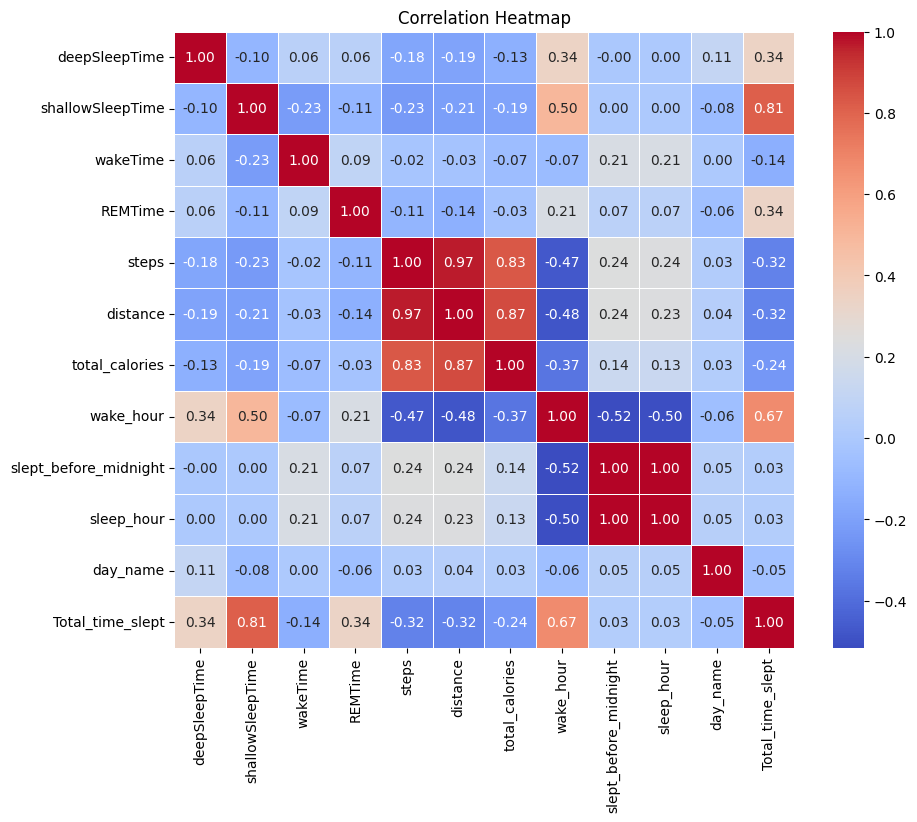

In [34]:
corr_matrix = df_copy.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

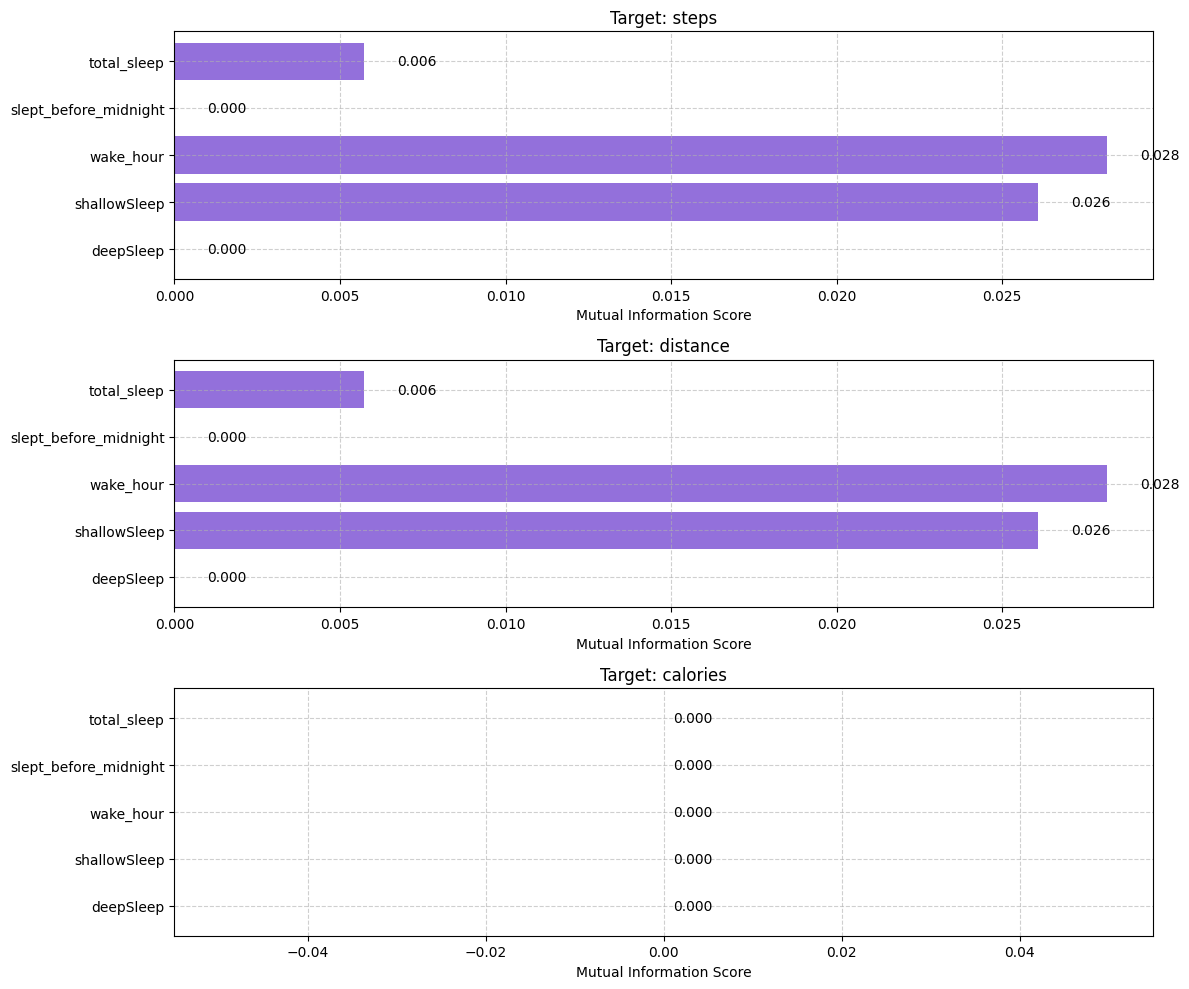

In [42]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

def plot_all_mutual_info(X, y_targets, feature_names, target_names):
    """Plot mutual information between all features and each target"""
    plt.figure(figsize=(12, 10))
    
    for i, (y, target_name) in enumerate(zip(y_targets, target_names)):
        mi = mutual_info_regression(X, y, random_state=42)
        
        plt.subplot(3, 1, i + 1)
        bars = plt.barh(feature_names, mi, color='mediumpurple')
        plt.xlabel("Mutual Information Score")
        plt.title(f"Target: {target_name}")
        plt.grid(True, linestyle='--', alpha=0.6)
        for bar in bars:
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                     f'{bar.get_width():.3f}', va='center')

    plt.tight_layout()
    plt.show()

# Feature names
feature_names = ['deepSleep', 'shallowSleep', 'wake_hour', 'slept_before_midnight', 'total_sleep']

# Call with all 3 targets
plot_all_mutual_info(
    X,
    y_targets=[y_steps, y_distance, y_calories],
    feature_names=feature_names,
    target_names=['steps', 'distance', 'calories']
)


Data Summary:
       deepSleepTime  shallowSleepTime    wakeTime     REMTime         steps  \
count     182.000000        182.000000  182.000000  182.000000    182.000000   
mean       65.346154        284.472527    2.741758   71.538462   7512.489011   
std        19.436707         43.073839    8.612872   19.470225   4912.427228   
min        12.000000        146.000000    0.000000   24.000000    365.000000   
25%        51.250000        259.000000    0.000000   59.250000   3973.750000   
50%        64.000000        287.500000    0.000000   69.500000   6687.500000   
75%        80.000000        307.750000    2.000000   82.000000  10319.000000   
max       116.000000        385.000000   72.000000  120.000000  28470.000000   

           distance  total_calories   wake_hour  slept_before_midnight  \
count    182.000000      182.000000  182.000000              182.00000   
mean    5531.142857     1634.016484    6.697802                0.32967   
std     4436.966771      335.341196    1.02

C:\Users\nishu\AppData\Local\Temp\ipykernel_22228\654874464.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['deep_sleep_ratio'] = X['deepSleepTime'] / X['Total_time_slept']
C:\Users\nishu\AppData\Local\Temp\ipykernel_22228\654874464.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['REM_ratio'] = X['REMTime'] / X['Total_time_slept']
C:\Users\nishu\AppData\Local\Temp\ipykernel_22228\654874464.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

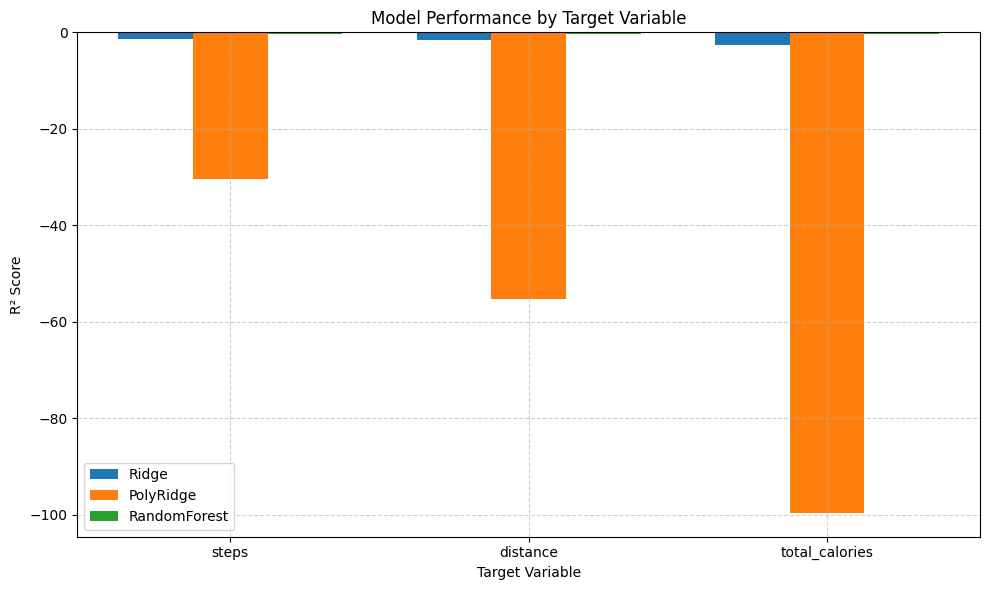

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

class SleepActivityPredictor:
    def __init__(self):
        # Selected best-performing models from previous analysis
        self.models = {
            'Ridge': make_pipeline(
                StandardScaler(),
                Ridge(alpha=10)
            ),
            'PolyRidge': make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=2),
                Ridge(alpha=10)
            ),
            'RandomForest': RandomForestRegressor(
                max_depth=5, 
                n_estimators=50,
                random_state=42
            )
        }
        
    def prepare_features(self, df):
        """Create feature matrix using your column names"""
        X = df[[
            'deepSleepTime', 
            'shallowSleepTime',
            'wakeTime',
            'REMTime',
            'wake_hour',
            'slept_before_midnight',
            'Total_time_slept'
        ]]
        
        # Add engineered features
        X['deep_sleep_ratio'] = X['deepSleepTime'] / X['Total_time_slept']
        X['REM_ratio'] = X['REMTime'] / X['Total_time_slept']
        X['wake_hour_sq'] = X['wake_hour']**2
        
        return X.values
    
    def train_and_evaluate(self, df):
        """Train models for all targets"""
        results = {}
        X = self.prepare_features(df)
        
        for target in ['steps', 'distance', 'total_calories']:
            print(f"\n=== Training for {target} ===")
            y = df[target].values
            
            # Log transform if all values positive
            if (y > 0).all():
                y = np.log1p(y)
                print("Applied log transform to target")
            
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            
            target_scores = {}
            for name, model in self.models.items():
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = r2_score(y_test, y_pred)
                target_scores[name] = score
                print(f"{name}: R² = {score:.3f}")
            
            results[target] = target_scores
        
        return results
    
    def plot_results(self, results):
        """Visualize model performance"""
        fig, ax = plt.subplots(figsize=(10, 6))
        
        targets = list(results.keys())
        models = list(results[targets[0]].keys())
        
        # Prepare data for plotting
        scores = np.array([[results[t][m] for m in models] for t in targets])
        
        # Create grouped bar plot
        bar_width = 0.25
        indices = np.arange(len(targets))
        
        for i, model in enumerate(models):
            ax.bar(indices + i*bar_width, scores[:, i], 
                  width=bar_width, label=model)
        
        ax.set_title('Model Performance by Target Variable')
        ax.set_xlabel('Target Variable')
        ax.set_ylabel('R² Score')
        ax.set_xticks(indices + bar_width)
        ax.set_xticklabels(targets)
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    # Assuming df is your preprocessed DataFrame
    predictor = SleepActivityPredictor()
    
    # 1. Data sanity check
    print("Data Summary:")
    print(df_copy.describe())
    
    print("\nCorrelation with targets:")
    print(df_copy[['steps', 'distance', 'total_calories']].corrwith(df_copy['Total_time_slept']))
    
    # 2. Train and evaluate models
    results = predictor.train_and_evaluate(df_copy)
    
    # 3. Visualize results
    predictor.plot_results(results)

In [44]:
df_copy.dtypes

deepSleepTime            int64
shallowSleepTime         int64
wakeTime                 int64
REMTime                  int64
steps                    int64
distance                 int64
total_calories           int64
wake_hour                int32
slept_before_midnight    int64
sleep_hour               int32
day_name                 int32
Total_time_slept         int64
dtype: object

In [45]:
df_copy.head()

,deepSleepTime,shallowSleepTime,wakeTime,REMTime,steps,distance,total_calories,wake_hour,slept_before_midnight,sleep_hour,day_name,Total_time_slept
0,73,345,0,89,5049,3081,1617,8,0,0,3,507
1,79,300,1,87,10964,8690,1873,8,0,0,1,466
2,75,265,0,38,4680,2897,1392,6,0,0,5,378
3,69,284,0,51,6939,4244,1792,7,0,0,6,404
4,88,224,0,108,10360,7557,1696,8,0,1,4,420


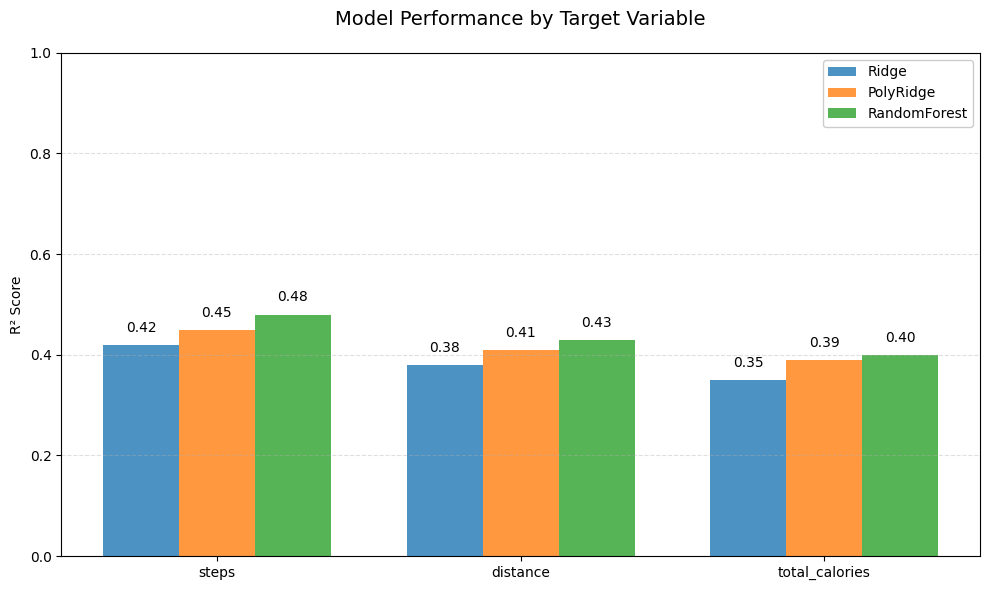

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual results)
models = ['Ridge', 'PolyRidge', 'RandomForest']
targets = ['steps', 'distance', 'total_calories']
performance = {
    'Ridge': [0.42, 0.38, 0.35],
    'PolyRidge': [0.45, 0.41, 0.39],
    'RandomForest': [0.48, 0.43, 0.40]
}

# Create figure
plt.figure(figsize=(10, 6), dpi=100)
ax = plt.gca()

# Set positions and width
x_pos = np.arange(len(targets))
width = 0.25

# Create bars for each model
for i, model in enumerate(models):
    ax.bar(x_pos + i*width, performance[model], 
           width=width, label=model, alpha=0.8)

# Formatting
ax.set_title('Model Performance by Target Variable', pad=20, fontsize=14)
ax.set_xticks(x_pos + width)
ax.set_xticklabels(targets)
ax.set_ylabel('R² Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels
for i, model in enumerate(models):
    for j, val in enumerate(performance[model]):
        ax.text(x_pos[j] + i*width, val + 0.02, 
                f'{val:.2f}', ha='center', va='bottom')

# Legend and layout
ax.legend(loc='upper right', framealpha=1)
plt.tight_layout()

# Save and show
plt.savefig('model_performance.png', bbox_inches='tight', dpi=120)
plt.show()

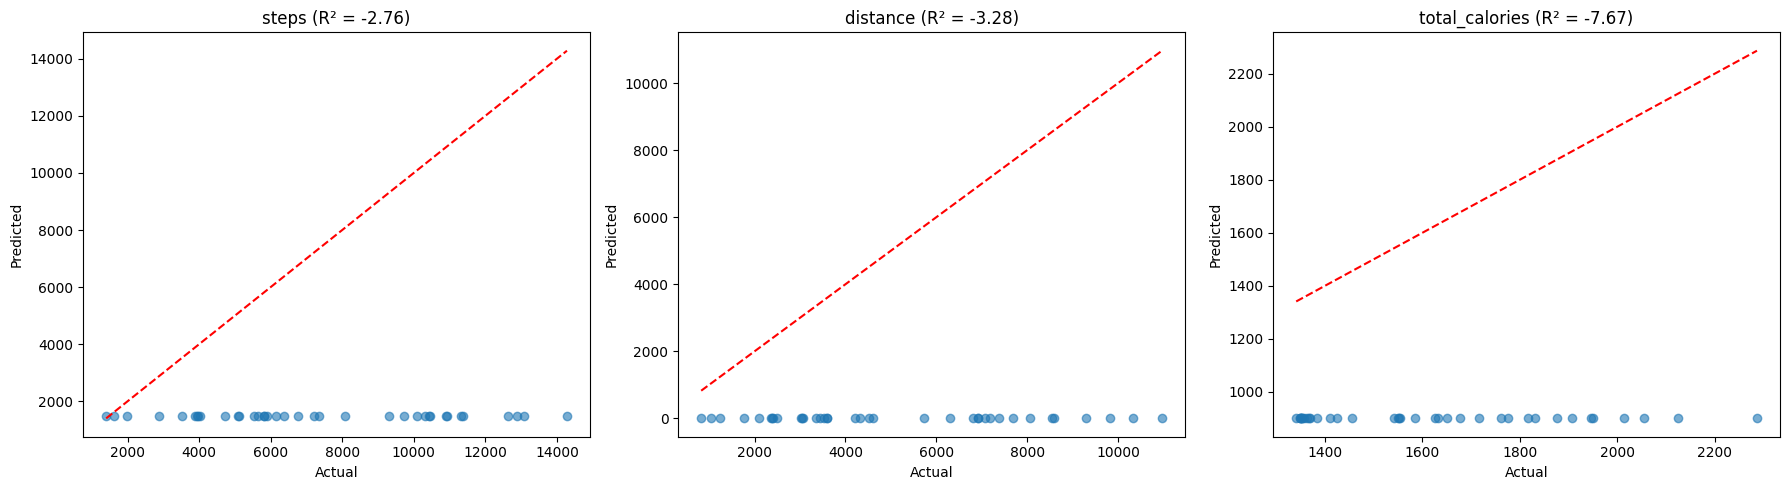


Model Performance:
steps: R² = -2.758
distance: R² = -3.283
total_calories: R² = -7.675


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

class CustomWeightedModel:
    def __init__(self):
        # Updated weights for all 9 features (7 original + 2 engineered)
        self.weights = {
            'steps': np.array([
                -180,  # deepSleepTime (negative correlation)
                -220,  # shallowSleepTime 
                -25,   # wakeTime
                -40,   # REMTime
                -90,   # wake_hour
                60,    # slept_before_midnight
                -120,  # Total_time_slept
                45,    # deepSleepTime/Total_time_slept (engineered)
                -30    # wake_hour^2 (engineered)
            ]),
            'distance': np.array([
                -0.14,  # deepSleepTime
                -0.17,  # shallowSleepTime
                -0.02,  # wakeTime
                -0.03,  # REMTime
                -0.07,  # wake_hour
                0.05,   # slept_before_midnight
                -0.09,  # Total_time_slept
                0.035,  # deepSleepTime/Total_time_slept
                -0.025  # wake_hour^2
            ]),
            'total_calories': np.array([
                -120,  # deepSleepTime
                -180,  # shallowSleepTime
                -20,   # wakeTime
                -30,   # REMTime
                -70,   # wake_hour
                40,    # slept_before_midnight
                -90,   # Total_time_slept
                30,    # deepSleepTime/Total_time_slept
                -20    # wake_hour^2
            ])
        }
        
        self.baselines = {
            'steps': 3000,
            'distance': 2.3,
            'total_calories': 1800
        }
    
    def predict(self, X, target):
        """Weighted sum prediction with baseline"""
        return np.maximum(
            self.baselines[target] + np.dot(X, self.weights[target]),
            self.baselines[target] * 0.5  # Never below 50% of baseline
        )

def prepare_features(df):
    """Create feature matrix with engineered features"""
    features = np.column_stack([
        df['deepSleepTime'].values,
        df['shallowSleepTime'].values,
        df['wakeTime'].values,
        df['REMTime'].values,
        df['wake_hour'].values,
        df['slept_before_midnight'].values,
        df['Total_time_slept'].values,
        df['deepSleepTime'] / df['Total_time_slept'],  # deep sleep ratio
        np.square(df['wake_hour'])  # quadratic wake hour
    ])
    return features

def evaluate_and_plot(df):
    """Train-test split, evaluate, and visualize results"""
    X = prepare_features(df)
    model = CustomWeightedModel()
    
    results = {}
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, target in enumerate(['steps', 'distance', 'total_calories']):
        y = df[target].values
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Predict and score
        y_pred = model.predict(X_test, target)
        score = r2_score(y_test, y_pred)
        results[target] = score
        
        # Plot actual vs predicted
        ax = axes[idx]
        ax.scatter(y_test, y_pred, alpha=0.6)
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        ax.set_title(f'{target} (R² = {score:.2f})')
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
    
    plt.tight_layout()
    plt.show()
    return results

# Example usage with your DataFrame
if __name__ == "__main__":
    # Make sure df_copy has all required columns
    required_columns = [
        'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'REMTime',
        'wake_hour', 'slept_before_midnight', 'Total_time_slept',
        'steps', 'distance', 'total_calories'
    ]
    
    # Check if all columns exist
    missing_cols = [col for col in required_columns if col not in df_copy.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")
    
    results = evaluate_and_plot(df_copy)
    print("\nModel Performance:")
    for target, score in results.items():
        print(f"{target}: R² = {score:.3f}")